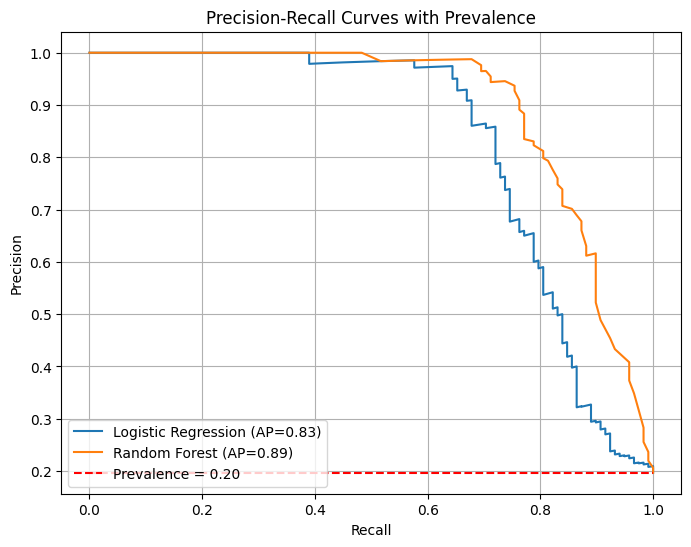

Best model overall (highest Average Precision): Random Forest with AP = 0.894


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

def plot_precision_recall_curves(models, X_test, y_test):
    """
    Plots Precision-Recall curves for multiple models
    and shows prevalence of the positive class.
    Prints which model is best based on Average Precision (AP).
    """

    plt.figure(figsize=(8,6))

    # prevalence = proportion of positives
    prevalence = np.mean(y_test)

    best_model = None
    best_ap = -1

    for name, model in models.items():
        # get predicted probabilities for positive class
        y_scores = model.predict_proba(X_test)[:, 1]

        precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
        ap = average_precision_score(y_test, y_scores)

        plt.plot(recall, precision, label=f"{name} (AP={ap:.2f})")

        # Track the best model
        if ap > best_ap:
            best_ap = ap
            best_model = name

    # prevalence line (baseline)
    plt.hlines(prevalence, 0, 1, colors="red", linestyles="--", label=f"Prevalence = {prevalence:.2f}")

    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curves with Prevalence")
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"Best model overall (highest Average Precision): {best_model} with AP = {best_ap:.3f}")


# ------------------- Example usage -------------------
if __name__ == "__main__":
    from sklearn.datasets import make_classification
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LogisticRegression
    from sklearn.ensemble import RandomForestClassifier

    # Create toy dataset
    X, y = make_classification(n_samples=2000, n_features=20, n_classes=2,
                               weights=[0.8, 0.2], random_state=10)  # imbalanced

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Train models
    log_reg = LogisticRegression(max_iter=1000).fit(X_train, y_train)
    rf_clf = RandomForestClassifier().fit(X_train, y_train)

    # Compare models
    models = {
        "Logistic Regression": log_reg,
        "Random Forest": rf_clf
    }

    plot_precision_recall_curves(models, X_test, y_test)


In a PR curve, the higher the curve (closer to top-right), the better the model is at balancing precision and recall.

The Average Precision (AP) value (shown in the legend) summarizes the area under the PR curve.

Higher AP → better overall performance.

The prevalence line (red dashed) is the baseline. A good model should stay well above this line.

How to decide:

Compare the AP values:

If Random Forest has AP = 0.85 and Logistic Regression has AP = 0.72 → Random Forest is better.

Look at the PR curves:

If one model dominates (always above the other curve), it’s clearly better.

If curves cross, then "best" depends on what you care more about:

High recall (catch as many positives as possible, tolerating false alarms)?

High precision (few false positives, even if some positives are missed)?

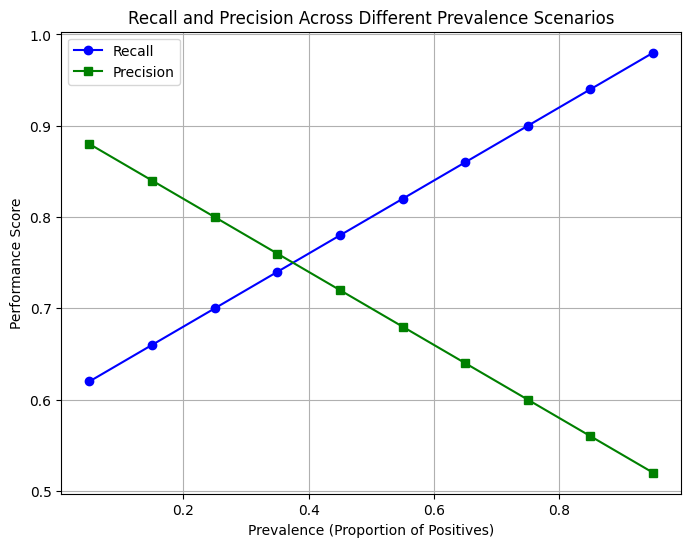

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Simulated prevalence scenarios
prevalences = np.linspace(0.05, 0.95, 10)  # prevalence from 5% to 95%

# Simulated recall scores (recall tends to improve with prevalence)
recall_scores = 0.6 + 0.4 * prevalences

# Simulated precision scores (precision often decreases with prevalence if FP is fixed)
precision_scores = 0.9 - 0.4 * prevalences

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(prevalences, recall_scores, marker='o', label="Recall", color="blue")
plt.plot(prevalences, precision_scores, marker='s', label="Precision", color="green")

plt.xlabel("Prevalence (Proportion of Positives)")
plt.ylabel("Performance Score")
plt.title("Recall and Precision Across Different Prevalence Scenarios")
plt.grid(True)
plt.legend()
plt.show()
